# Logistic Regression
Smilar to linear regression but for predicting a categorical target label. / 
Logistic Regression - Classification Algorithm

In [1]:
# INTERPRETING RESULTS:
# - Odds ratio and coefficients
# - Classification Metrics (Accuracy, Precision, Recall)
# - ROC CURVES

In [2]:
#Classification algo's produce probability prediciton metric of how probable it is for input to match label
#Classification algos, use a variety of different error metrics and methods of performance evaluation.

In [3]:
#Transformation of linear regression into classification model using a logistic function - aka sigmoid function
#used in statistical modelling as things seem to have a limiting factor and shows some sort of levelling off when
#...graph of function is plot

In [2]:
#transforming linear regression using the logistic function to allow for a more categorical fit of a y-label
#... rather than somewhere inbetween two values like a continous label
#LOGISTIC FUNCTION TRANSFORMS AND INPUT TO BE BETWEEN 0 AND 1

In [3]:
#setting of cut off points between labels to ensure labelling is categorical and not continuous  
#cut off point basically introduces probability into the y axis/ model.

In [4]:
#Mathematics to convert from linear regression to logistic. 
#ISLR Section 4.3
#Y-hat linear regression equation INTO logistic function to create Logistic Regression
#Logistic regression equation, coefficient in denominator - shows non linear relationship
#... employ natural logs to get better relationship for interpretation???

In [5]:
# Term : ODDS
#probability of something happening vs it not happening.
#1 to 1 is 50% probaility. 
# probability of it happening / 1 - probability of it happening 

#wil allow us to solve for coefficients and feature x in terms of log ODDS.

# ln(yhat/1-yhat) = Sum of Betacoefficients*feature

In [6]:
# apply log odds ln(yhat/1-yhat) to y axis, allows for conversion of cuve log function curve into a line
#... coefficients now in terms of log odds - no linear relationship between x and y 

In [8]:
#positive beta coefficients indicates increase in probability of belonging to a class with increase in associated x feature.
#Negative beta coefficients inficates DECREASE in probability of belonging to a class with INCREASE in associated x feature.

In [9]:
#MAGNITUDE OF COEFFICIENTS
#compare magnitudes of coefficients against eachother for insight over which features have strongest effect on prediction output

In [10]:
#normally we'd fit curve using residual sum of squares like we do in linear regression but cant do that with logistic regression
#... use of something called best fit with maximum likelihood

In [11]:
#BEST FIT MAXIMUM LIKELIHOOD TO FIND BEST FITTING MODEL
#ISLR 4.3.2
#MATHEMATICAL THEORY IS BEYOND SCOPE OF BOOK

# LOGISTIC REGRESSION WITH SCIKIT-LEARN

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [15]:
df = pd.read_csv("DATA/hearing_test.csv")

In [16]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [17]:
#build model to predict of test pass or fail

In [18]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [19]:
#count of how many people passed or failed
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

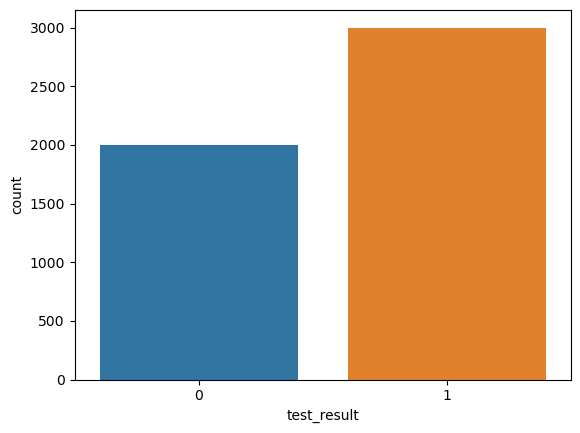

In [21]:
sns.countplot(data=df, x='test_result')

<Figure size 960x720 with 0 Axes>

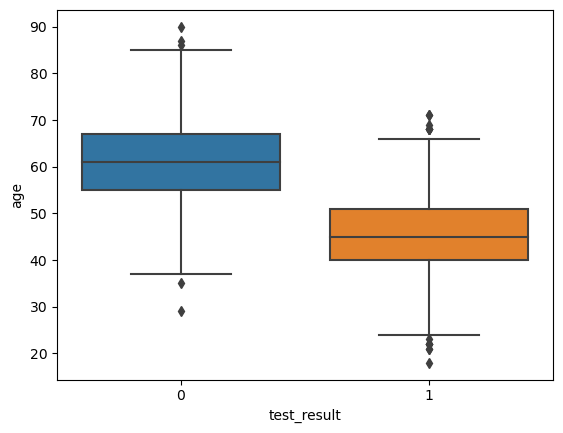

<Figure size 960x720 with 0 Axes>

In [23]:
sns.boxplot(x='test_result',y='age',data=df)
plt.figure(dpi=150)

In [24]:
#shows how people who are older are less likely to pass test

<Figure size 960x720 with 0 Axes>

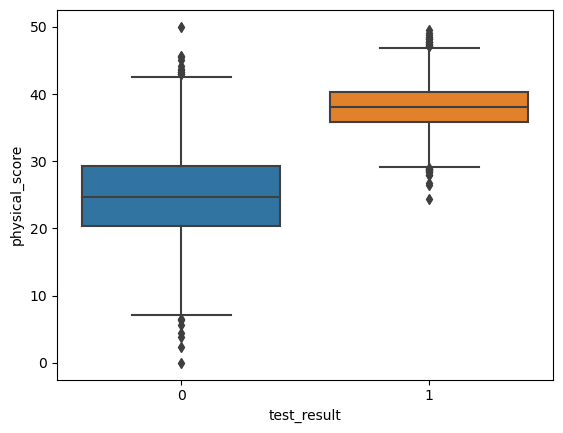

<Figure size 960x720 with 0 Axes>

In [25]:
sns.boxplot(x='test_result',y='physical_score',data=df)
plt.figure(dpi=150)

In [28]:
#greater physical score, more likely to pass test.

<AxesSubplot:xlabel='age', ylabel='physical_score'>

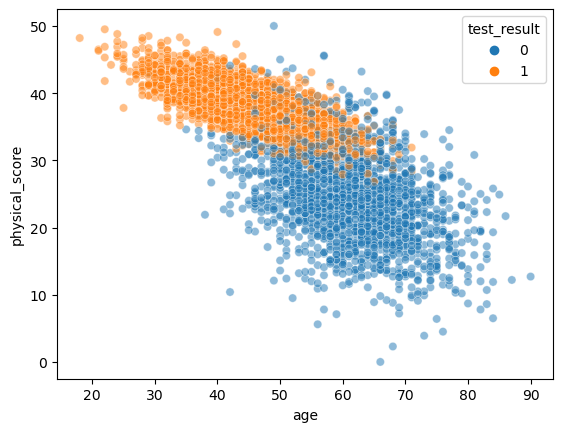

In [32]:
sns.scatterplot(x='age',y='physical_score',
                data=df,hue='test_result',
               alpha=0.5)

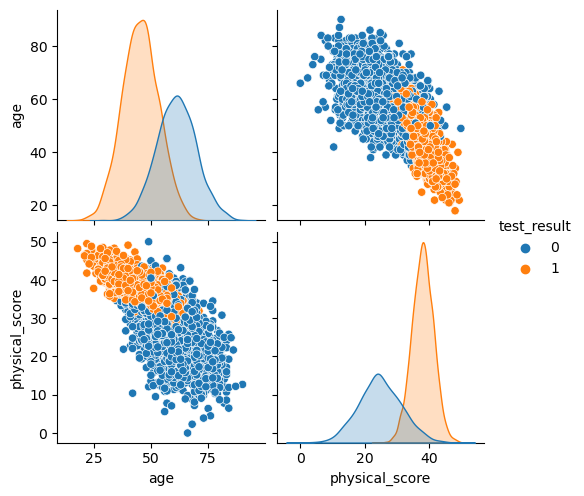

In [34]:
#always recommend doing pairplot
sns.pairplot(data=df,hue='test_result')

<AxesSubplot:>

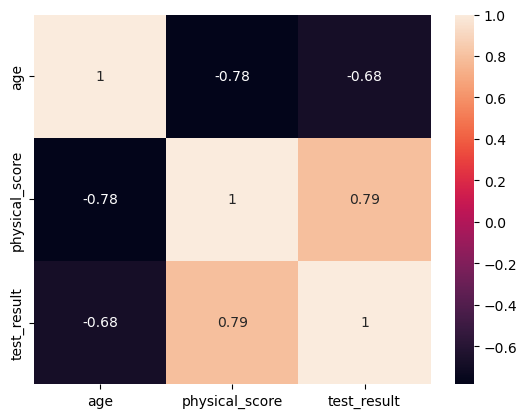

In [36]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

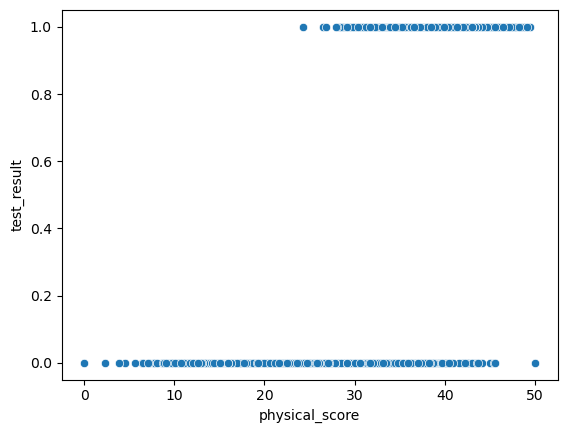

In [38]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

In [43]:
#scatter showign distribution of data

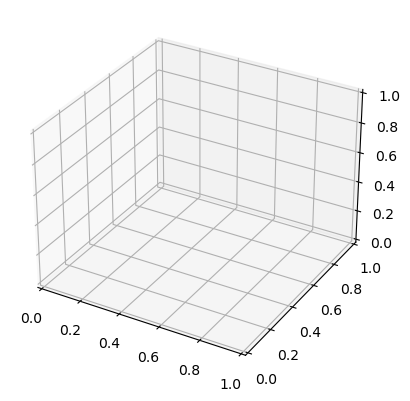

In [45]:
#https://matplotlib.org/3.5.3/gallery/mplot3d/scatter3d.html
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

Text(0.5, 0, 'test_result')

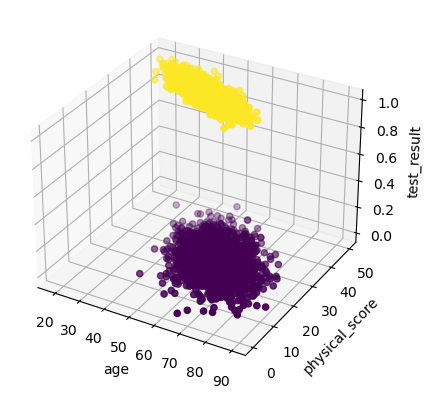

In [56]:
#https://matplotlib.org/3.5.3/gallery/mplot3d/scatter3d.html
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])


ax.set_xlabel('age')
ax.set_ylabel('physical_score')
ax.set_zlabel('test_result')

# Training LOGISTIC REGRESSION model

In [57]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [58]:
X = df.drop('test_result',axis=1)

In [59]:
y = df['test_result']

In [60]:
#split before scaling
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [62]:
#scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
scaled_x_train = scaler.fit_transform(X_train) #only fit to X_train

In [64]:
scaled_x_test = scaler.transform(X_test)

In [65]:
#create model
from sklearn.linear_model import LogisticRegression

In [66]:
#help(LogisticRegression)

In [67]:
log_model = LogisticRegression()

In [68]:
#train model
log_model.fit(scaled_x_train,y_train)

LogisticRegression()

In [70]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [71]:
y_pred = log_model.predict(scaled_x_test) #predict y values of the testing x values

In [72]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [74]:
y_pred = log_model.predict_proba(scaled_x_test) #predict y values of the testing x values

In [76]:
#y_pred

# CLASSIFICATION METRICS 

In [78]:
# MODEL COULD INCORRECTLY PREDICT.
# COULD SAY SOMEONE PASSES WHEN IN REALITY THEY HAVE FAILED.
# A PROBLEM IF MODEL IS TO PREDICT INFECTION
# CONFUSION MATRIX
# FALSE POSITIVES / FALSE NEGATIVES 
# FROM THIS WE CAN CALC RATIOS OF PERFORMANCE.

In [79]:
# ERROR METRICS
# 1. Accuracy - how many times is it correct
# accuracy = (total False Negative + total False Positive)/Absolute Total tested.
#...(Everyone). 

In [81]:
# 1.2 Accuracy Paradox 
# .. can report back high accuracy but be incorrect depending on how data is collected, and how false negatives and totals 
#.. are created in the real world.
# many real world data has imbalanced classes, meaning distored accuracy. 
# DONT SOLEY RELY ON ACCURACY AS PERFORMANCE METRIC.

In [82]:
#2. Recall aka sensitivity:
# when its a positive case how often is it correct? RECALL = True positives / total actual positives
# IF 0 RECALL, MODEL ISNT CATCHING CASES - ITS OVER FIT 


In [83]:
#3. Precision:
# when prediction is positive how often is it correct?
# PRECISION = TRUE POSITIVE / TOTAL PREDICTED POSITIVES 
#IF PRECISION UNDEFINED 0/0 - PROBLEM WITH MODEL.

In [84]:
#4.F1-SCORE
# harmonic mean of precison and recall 
# F = 2*precision*recall / precision + recall 
# lets you know how well youre doing with both. but if F1 = 0 something is up.
#see confusion matrix on wiki

In [85]:
#5. ROC CURVES
# reciever operator characteristic curve.
# trade off between true positives and false positives

# PERFORMANCE EVALUATION OF MODEL

In [86]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [87]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [88]:
#age is negative - as age feature increases, odds of belonging to 1 test result will decrease
#physical score . 3.4599 .. as increases, more likely to belong to 1 test result 1.

In [90]:
#METRICS
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [91]:
y_pred = log_model.predict(scaled_x_test)

In [93]:
accuracy_score(y_test,y_pred) #93% - remember accuracy paradox

0.93

In [94]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [95]:
from sklearn.metrics import plot_confusion_matrix

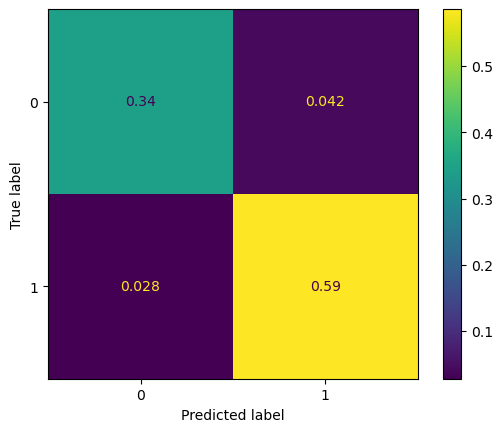

In [100]:
plot_confusion_matrix(log_model,scaled_x_test,y_test,normalize='all')

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [102]:
from sklearn.metrics import precision_score,recall_score

In [103]:
precision_score(y_test,y_pred)

0.9331210191082803

In [105]:
recall_score(y_test,y_pred)

0.9543973941368078

# PLOT ROC CURVE , PRECISION RECALL CURVE


In [112]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve

C:\Users\Pyrex_000\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


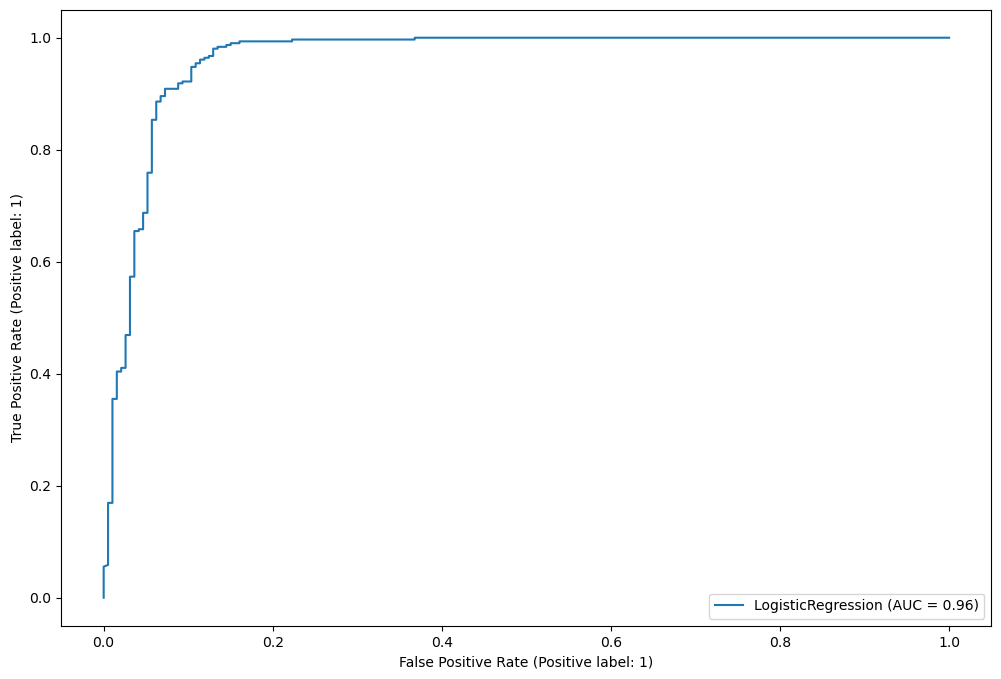

In [111]:
fig,ax = plt.subplots(figsize=(12,8))
plot_roc_curve(log_model,scaled_x_test,y_test,ax=ax)

C:\Users\Pyrex_000\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


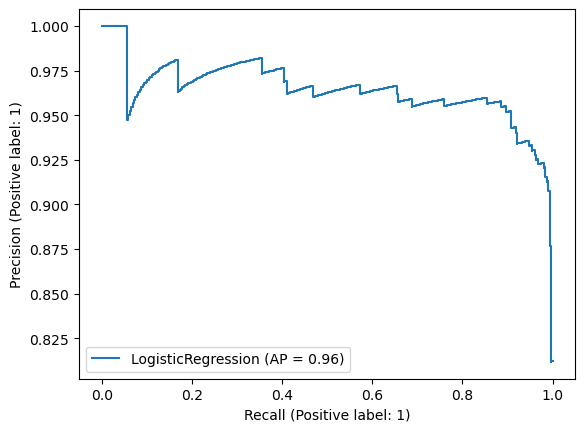

In [114]:
plot_precision_recall_curve(log_model,scaled_x_test,y_test)

In [118]:
log_model.predict_proba(scaled_x_test)[0] #gives probability of first value in x_test

array([0.02384343, 0.97615657])

In [119]:
y_test[0]

1

In [ ]:
#End of notes